# 📘 Taller Evaluativo (20%) - Análisis de Portafolio
### Curso: Ingeniería Financiera / Programación  
### Herramienta: Google Colab  
---
### 🎯 Objetivo
Este taller busca que comprendas qué es un análisis de portafolio, cómo se calculan y analizan sus métricas (rentabilidad, riesgo y correlación), y cómo se interpreta el resultado para tomar decisiones de inversión.

👉 **Importante:** No basta con ejecutar el código. Debes **completar los espacios en blanco**, responder las **preguntas de investigación** y redactar un **análisis final**.

## 1. Importación de librerías
Primero, importa las librerías necesarias para trabajar con datos financieros.

In [5]:
# COMPLETAR: importa las librerías necesarias (yfinance, pandas, numpy, matplotlib, seaborn)
# Ejemplo: import yfinance as yf

# COMPLETAR AQUÍ

In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Descarga de datos
Usa `yfinance` para descargar los precios de **Google (GOOG)**, **Amazon (AMZN)** y **Microsoft (MSFT)** durante los últimos 3 años. Utiliza la columna `Adj Close`.

🔎 **Pregunta:** ¿Por qué es más adecuado usar `Adj Close` que `Close` para un análisis financiero?

**Respuesta:** Adj Close: Corrige retroactivamente la serie de precios para que sea continua y comparable. Por ejemplo, si una acción vale 100 USD y hay un split 2:1, el “Close” bajaría a 50 USD, pero el “Adj Close” reescala todo el historial para que ese cambio no distorsione el análisis.

In [10]:
# COMPLETAR: descarga los precios de las acciones usando yf.download

acciones = ["GOOG", "AMZN", "MSFT"]
datos = yf.download(tickers=acciones, start="2022-01-01", end="2025-09-18" )["Close"]
datos.head() # Veo los primeros 5 datos

/tmp/ipython-input-3282826101.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(tickers=acciones, start="2022-01-01", end="2025-09-18" )["Close"]
[*********************100%***********************]  3 of 3 completed


Ticker,AMZN,GOOG,MSFT
Date,,,
2022-01-03,170.404495,144.088470,324.504547
2022-01-04,167.522003,143.434937,318.940277
2022-01-05,164.356995,136.717896,306.696838
2022-01-06,163.253998,136.616089,304.273315
2022-01-07,162.554001,136.073318,304.428467


In [11]:
datos.tail() # Veo los últimos 5 datos

Ticker,AMZN,GOOG,MSFT
Date,,,
2025-09-11,229.949997,240.779999,501.010010
2025-09-12,228.149994,241.380005,509.899994
2025-09-15,231.429993,251.759995,515.359985
2025-09-16,234.050003,251.419998,509.040009
2025-09-17,231.619995,249.850006,510.019989


## 3. Visualización de precios
Grafica en una misma figura la evolución de los precios de cierre ajustados de las tres acciones.

🔎 **Pregunta:** ¿Cuál de las tres acciones muestra mayor crecimiento en estos 3 años?

**Respuesta:** La acción que muestra mayor crecimiento en el periodo de 3 años es microsoft

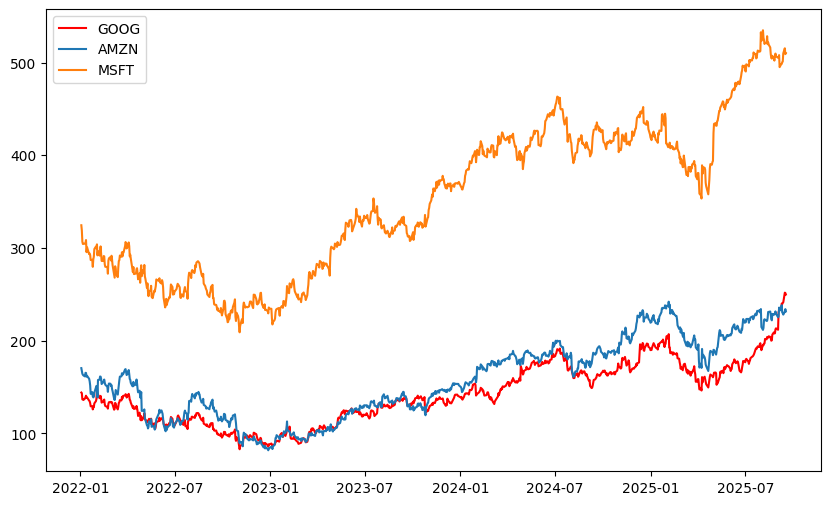

In [12]:
# COMPLETAR: grafica las tres series de precios en una sola gráfica

plt.figure(figsize=(10,6))
plt.plot(datos["GOOG"], label="GOOG",color="red")
plt.plot(datos["AMZN"], label="AMZN")
plt.plot(datos["MSFT"], label="MSFT")
plt.legend()
plt.show()

## 4. Rentabilidades
Calcula las **rentabilidades logarítmicas diarias** y grafícalas.

🔎 **Pregunta:** ¿Qué diferencias encuentras entre observar precios y observar rentabilidades?

**Respuesta:** Los precios ayudan a observar la tendencia general y saber si la accion sube o baja, y las rentabilidades son cambios en el precio y representa la ganancia o pérdida que genere

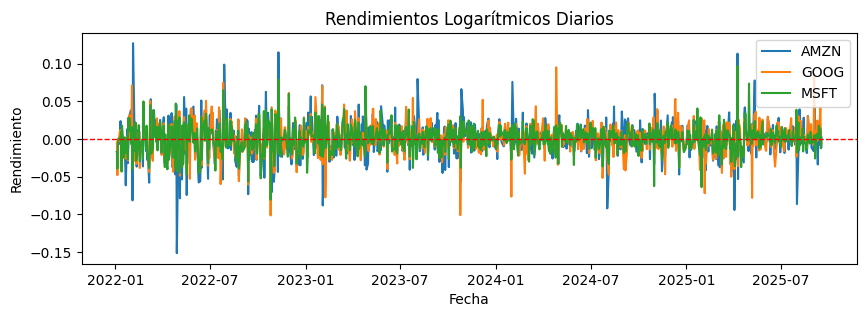

In [58]:
# COMPLETAR: calcula los rendimientos logarítmicos

rendimientos = np.log(datos / datos.shift(1))
rendimientos.head()

plt.figure(figsize=(10,3))
plt.plot(rendimientos)
plt.axhline(0, color="red", linestyle="--", linewidth=1)
plt.title("Rendimientos Logarítmicos Diarios")
plt.xlabel("Fecha")
plt.ylabel("Rendimiento")
plt.legend(rendimientos.columns)
plt.show()

## 5. Medidas estadísticas
Calcula la **rentabilidad promedio** y la **volatilidad (desviación estándar)** de cada acción.

🔎 **Pregunta:** ¿Cuál acción es más riesgosa? ¿Cuál ofrece mayor retorno?

**Respuesta:** La acción más riesgosa se define como la que tiene mayor volatilidad y la acción que ofrece mayor retorno es la de mayor rentabilidad promedio. Para nuestro caso la de mayor riesgo es AMZN y la de mayor retorno es GOOG

In [50]:
# COMPLETAR: calcula media y desviación estándar

media = rendimientos.mean()
volatilidad = rendimientos.std()

print("Rentabilidad promedio diaria:")
print(media)
print("\nVolatilidad diaria:")
print(volatilidad)

Rentabilidad promedio diaria:
Ticker
AMZN    0.000822
GOOG    0.001190
MSFT    0.001006
dtype: float64

Volatilidad diaria:
Ticker
AMZN    0.021280
GOOG    0.019836
MSFT    0.015977
dtype: float64


In [51]:
accion_mas_riesgosa = volatilidad.idxmax()

print("La acción más riesgosa (con mayor volatilidad) es:", accion_mas_riesgosa)

La acción más riesgosa (con mayor volatilidad) es: AMZN


In [52]:
accion_mayor_retorno = media.idxmax()

print("Acción con mayor retorno:", accion_mayor_retorno)

Acción con mayor retorno: GOOG


## 6. Correlación entre activos
Calcula y grafica la matriz de correlación entre las acciones.

🔎 **Pregunta:** ¿Qué significa que dos acciones tengan una correlación cercana a 1? ¿Y cercana a 0 o negativa?

**Respuesta:** **Cercana a 1:** Las acciones se mueven casi igual suben y bajan juntas. **Cercana a 0:** No tienen relación clara en sus movimientos
**Negativa:** Se mueven en direcciones opuestas cuando una sube, la otra tiende a bajar

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

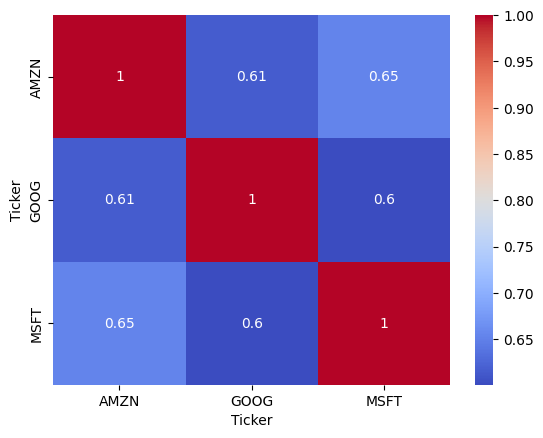

In [54]:
# COMPLETAR: calcula la correlación y haz un mapa de calor con seaborn

correlacion = rendimientos.corr()
sns.heatmap(correlacion, annot=True, cmap="coolwarm")
plt.show()

## 7. Portafolio simulado
Supón un portafolio con la siguiente distribución:
- 40% Google
- 30% Amazon
- 30% Microsoft

Calcula el **retorno esperado** y la **volatilidad del portafolio**.

🔎 **Preguntas:**
1. ¿Cómo interpretas el retorno esperado del portafolio?
2. ¿Qué efecto tuvo la diversificación sobre la volatilidad respecto a invertir en una sola acción?

**Respuesta 1:** Es la ganancia promedio esperada por periodo (por ejemplo, diario o anual) considerando cuánto se invierte en cada acción, representa lo que, en promedio, se ganaría si el comportamiento futuro es similar al pasado.

**Respuesta 2:** La diversificación reduce la volatilidad (riesgo) del portafolio comparado con invertir en una sola acción, como las acciones no se mueven exactamente igual, las caídas de unas pueden compensarse con las subidas de otras.

In [59]:
# COMPLETAR: cálculo del retorno y riesgo del portafolio

pesos = np.array([0.4, 0.3, 0.3])

retorno_portafolio = np.dot(pesos, rendimientos.mean())
covarianza = rendimientos.cov()
vol_portafolio = np.sqrt(np.dot(pesos.T, np.dot(covarianza, pesos)))

print("Retorno esperado del portafolio (diario):", retorno_portafolio)
print("Volatilidad del portafolio (diaria):", vol_portafolio)

Retorno esperado del portafolio (diario): 0.00045591423669038374
Volatilidad del portafolio (diaria): 0.01849315917509965


In [61]:
dias = 252 ##días bursátiles o hábiles que opera la bolsa, se descartan fines de semana y festivos
retorno_anual = retorno_portafolio * dias
volatilidad_anual = vol_portafolio * np.sqrt(dias)

print(f"Retorno esperado diario: {retorno_portafolio:.6f} ≈ {retorno_portafolio*100:.2f}%")
print(f"Retorno esperado anual: {retorno_anual:.4f} ≈ {retorno_anual*100:.2f}%")

print(f"Volatilidad diaria: {vol_portafolio:.5f} ≈ {vol_portafolio*100:.2f}%")
print(f"Volatilidad anual: {volatilidad_anual:.4f} ≈ {volatilidad_anual*100:.2f}%")

Retorno esperado diario: 0.000456 ≈ 0.05%
Retorno esperado anual: 0.1149 ≈ 11.49%
Volatilidad diaria: 0.01849 ≈ 1.85%
Volatilidad anual: 0.2936 ≈ 29.36%


## ✍️ 8. Conclusión final
Redacta un análisis completo del portafolio respondiendo:
- ¿Qué acción fue más rentable y cuál más riesgosa?

**Respuesta:** De acuerdo con los datos obtenidos, se confirma que la acción que más rentabilidad ofrece es GOOGLE aunque también tiene un nivel de volatilidad relativamente alto, pero la acción más riesgosa es AMAZON porque porque presenta la mayor variabilidad diaria.

- ¿Qué tan correlacionadas están las acciones?

**Respuesta:** La correlación entre las acciones está con valores entre 0,65 y 0,69, lo que significa que están por encima de cero y cercano a 1 positivo. Quiere decir que están correlacionadas en la misma dirección, cuando una sube las otras dos también.

- ¿Qué aportó la diversificación al portafolio?

**Respuesta:** Redujo el riesgo respecto a las acciones individuales.

- Si fueras un inversionista, ¿invertirías en este portafolio? Justifica tu respuesta.

**Respuesta:** El portafolio ofrece un retorno anual esperado de aprox. 11.5%, lo cual es bastante atractivo. Pero el riesgo anualizado del 29% es elevado, aunque menor que el de invertir solo en la acción más volátil (AMZN). Esto muestra el efecto positivo de la diversificación.

Sí sería razonable invertir, porque la diversificación redujo el riesgo respecto a las acciones individuales, manteniendo un retorno esperado atractivo. Sin embargo, todo depende del perfil de riesgo.

En conclusión es una buena decisión invertir, teniendo en cuenta que el nivel de riesgo es moderado-alto, es mejor que invertir en cada acción por separado y se tiene un retorno esperado competitivo.